In [5]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import ipywidgets as widgets

model = tf.keras.models.load_model('my_model')

[INFO kernel.cc:1176] Loading model from path my_model/assets/ with prefix baef0b42226746ef
[INFO abstract_model.cc:1248] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO kernel.cc:1022] Use fast generic engine


In [6]:
from ipywidgets import HBox, VBox, IntSlider, interactive_output
from IPython.display import display
from datetime import date

date = widgets.DatePicker(description='Date of transaction:')
hour = widgets.BoundedIntText(
    value=23,
    min=0,
    max=23,
    step=1,
    description='Time:')
minute = widgets.BoundedIntText(
    value=0,
    min=0,
    max=59,
    step=1,
    description='')
second = widgets.BoundedIntText(
    value=0,
    min=0,
    max=59,
    step=1,
    description='')
time = HBox([hour, minute, second])
category = widgets.Dropdown(
    options=[('Personal Care', 'personal_care'), ('Health/Fitness', 'health_fitness'), ('Miscellaneous', 'misc_net'),
            ('Travel', 'travel'), ('Entertainment', 'entertainment'), ('Food/Dining', 'food_dining'), 
             ('Apparel', 'shopping_net'), ('Grocery', 'grocery_pos'), ('Transport', 'gas_transport'), 
             ('Kids/Pets', 'kids_pets'), ('Home', 'home')],
    value='entertainment',
    description='Category:')
amount = widgets.FloatText(
    value=614.72,
    description='Amount:')
first = widgets.Text(
    value='Michael',
    placeholder='First',
    description='Name:')
last = widgets.Text(
    value='Jackson',
    placeholder='Last',
    description='')
name = HBox([first, last])
city = widgets.Text(
    value='Pea Ridge',
    description='City')
state = widgets.Dropdown(
    options=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 
             'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 
             'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
    value='AL',
    description='State:')
postal = widgets.BoundedIntText(
    value=72751,
    min=10000,
    max=99999,
    step=1,
    description='zip code:')
birth = widgets.DatePicker(description='Date of birth:')

VBox([date, time, category, amount, name, city, state, postal, birth])

In [8]:
from IPython.display import display
output = widgets.Output()

submit = widgets.Button(description='Submit')

display(submit, output)

def on_submit_clicked(b):
    inputs = {
        'trans_date_trans_time': tf.constant(f'{date.value} {hour.value}:{minute.value}:{second.value}', 
                                             dtype=tf.string, shape=(1,)), 
       'category': tf.constant(category.value, dtype=tf.string, shape=(1,)), 
       'amt': tf.constant(amount.value, dtype=tf.float64, shape=(1,)),
       'first': tf.constant(first.value, dtype=tf.string, shape=(1,)), 
       'last': tf.constant(last.value, dtype=tf.string, shape=(1,)),
       'city': tf.constant(city.value, dtype=tf.string, shape=(1,)), 
       'state': tf.constant(state.value, dtype=tf.string, shape=(1,)), 
       'zip': tf.constant(postal.value, dtype=tf.int64, shape=(1,)), 
       'dob': tf.constant(f'{birth.value}', dtype=tf.string, shape=(1,))}

    result=model(inputs).numpy()[0][0]*100
    result=round(result, 2)
    with output:
        output.clear_output()
        print(f'The chance of this transaction being fraud is %{result}')
        if(result < 50):
            print('This transaction is not likely to be fraudulent')
        elif(result > 50 and result < 80):
            print('This transaction is somewhat likely to be fraudulent')
        elif(result > 80):
            print('This transaction is very likely to be fraudulent')
submit.on_click(on_submit_clicked)

print()
print()
print()

Button(description='Submit', style=ButtonStyle())

Output()

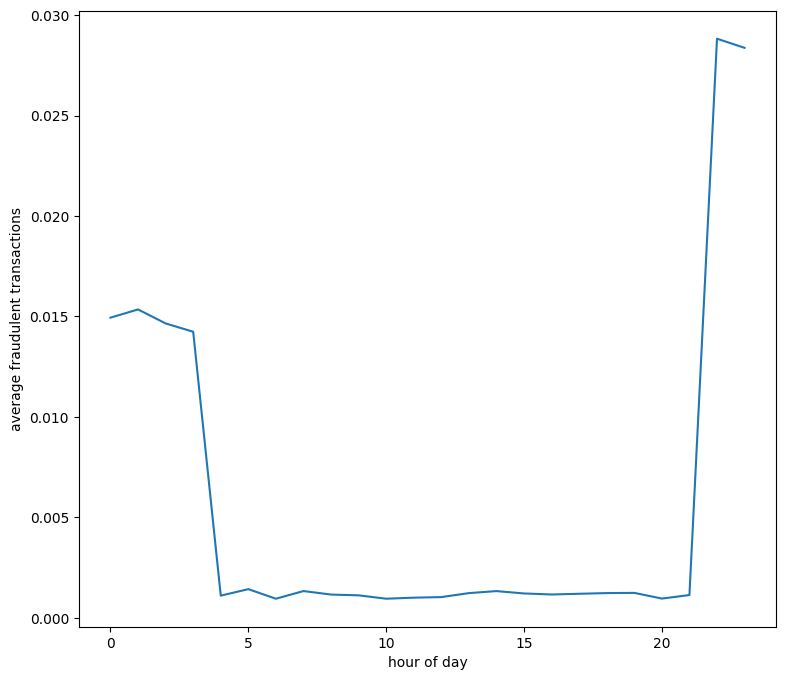

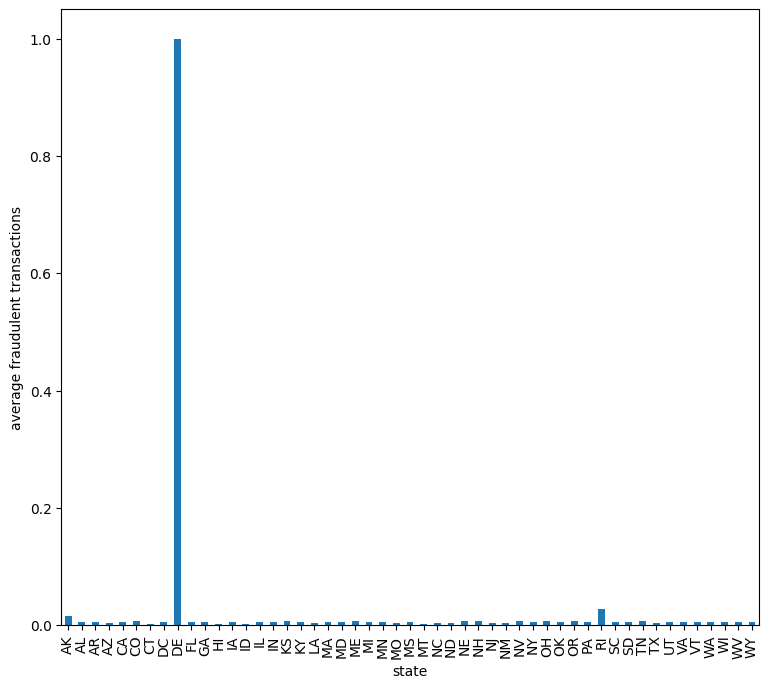

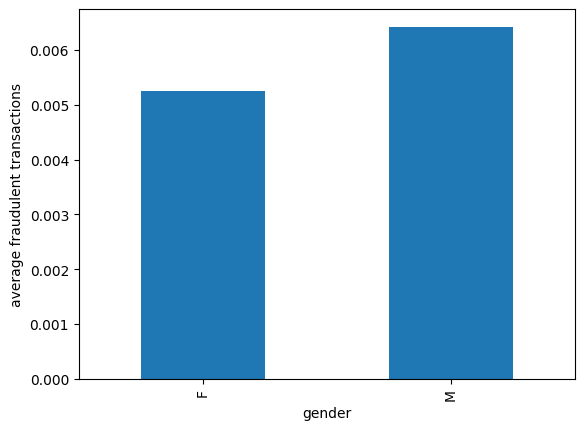

In [1]:
from IPython.display import Image

display(Image('pics/hour.png'))
display(Image('pics/state.png'))
display(Image('pics/gender.png'))

